Minimum: x=64.3213, y=32.9634, z=4347504.9540


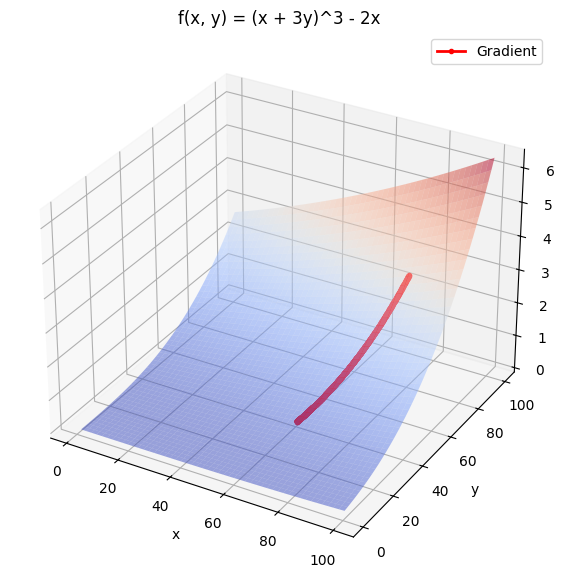

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definicja funkcji
def f(x, y):
    return (x + 3 * y)**3 - 2 * x

def df_dx(x, y):
    return 3 * (x + 3 * y)**2 - 2

def df_dy(x, y):
    return 9 * (x + 3 * y)**2

# Parametry
lr = 1e-7
epochs = 1000
x, y = 80.0, 80.0

history_x, history_y, history_z = [], [], []

# Pętla gradientowa
for _ in range(epochs):
    history_x.append(x)
    history_y.append(y)
    history_z.append(f(x, y))

    grad_x = df_dx(x, y)
    grad_y = df_dy(x, y)

    x = x - lr * grad_x
    y = y - lr * grad_y

    # Ograniczenia
    x = np.clip(x, 1, 100)
    y = np.clip(y, 1, 100)

print(f"Minimum: x={x:.4f}, y={y:.4f}, z={f(x,y):.4f}")

# Wizualizacja
xg = np.linspace(1, 100, 50)
yg = np.linspace(1, 100, 50)
X, Y = np.meshgrid(xg, yg)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, alpha=0.5, cmap='coolwarm')
ax.plot(history_x, history_y, history_z, 'r.-', linewidth=2, label='Gradient')

ax.set_title('f(x, y) = (x + 3y)^3 - 2x')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [1]:
import numpy as np

# Funkcje aktywacji
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.tanh(x)**2

# Inicjalizacja wag
np.random.seed(42)

W1 = np.random.randn(2, 2) * 0.1
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1) * 0.1
b2 = np.zeros((1, 1))

# Dane
X = np.array([[0.5, -0.2]])
Y = np.array([[0.8]])

# Forward Pass
Z1 = X @ W1 + b1
A1 = sigmoid(Z1)

Z2 = A1 @ W2 + b2
A2 = tanh(Z2)

loss = 0.5 * (Y - A2)**2

print(f"Wynik sieci: {A2[0][0]:.4f}")
print(f"Błąd (MSE): {loss[0][0]:.4f}")

# Backward Pass
dA2 = -(Y - A2)

dZ2 = dA2 * d_tanh(Z2)
dW2 = A1.T @ dZ2
db2 = np.sum(dZ2, axis=0, keepdims=True)

dA1 = dZ2 @ W2.T
dZ1 = dA1 * d_sigmoid(Z1)
dW1 = X.T @ dZ1
db1 = np.sum(dZ1, axis=0, keepdims=True)

print("\nGradienty:")
print(f"dW2:\n{dW2}")
print(f"db2:\n{db2}")
print(f"dW1:\n{dW1}")
print(f"db1:\n{db1}")

Wynik sieci: -0.0233
Błąd (MSE): 0.3389

Gradienty:
dW2:
[[-0.41385197]
 [-0.4037208 ]]
db2:
[[-0.82281568]]
dW1:
[[ 0.00240823  0.0024073 ]
 [-0.00096329 -0.00096292]]
db1:
[[0.00481646 0.00481461]]
